## Problem Statement - Predicting Lead Categories to Improve Sales Effectiveness

FicZon Inc is experiencing declining sales due to increased competition in the market. 

To boost sales effectiveness, they need a faster and more accurate way to identify high-quality leads.

The current manual lead categorization process is causing delays in engaging potential customers, leading to missed opportunities. 

FicZon aims to explore Machine Learning to pre-categorize leads and expects this approach to result in significant sales improvement.

The objective of this project is to implement a Machine Learning-based lead classification system that pre-categorizes leads based on their quality. 

The goal is to enhance sales effectiveness by enabling the sales team to prioritize high-quality leads and allocate resources efficiently.

# Importing Necessary Libraries

In [1]:
import mysql.connector
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Load the Dataset

In [2]:
connection = mysql.connector.connect(host = '18.136.157.135',
                                  user='dm_team2',
                                  password='DM!$Team&27@9!20!',
                                  database='project_sales')

* Create cursor to interact with the database

In [3]:
cursor=connection.cursor()
cursor.execute('show databases')
for i in cursor:
    print(i)

('information_schema',)
('project_sales',)


In [4]:
db_tables = pd.read_sql_query('show tables',connection)
print(db_tables)

  Tables_in_project_sales
0                    data


In [5]:
query = "select * from data"

In [6]:
query

'select * from data'

In [7]:
data = pd.read_sql(query,connection)
data

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
0,14-11-2018 10:05,,Website,984XXXXXXX,aXXXXXXX@gmail.com,Sales-Agent-11,,Mode-5,Open
1,14-11-2018 09:22,,Website,XXXXXXX,#VALUE!,Sales-Agent-10,,Mode-5,Open
2,14-11-2018 09:21,,Website,XXXXXXX,dXXXXXXX@yahoo.com,Sales-Agent-10,,Mode-5,Open
3,14-11-2018 08:46,,Website,XXXXXXX,wXXXXXXX@gmail.com,Sales-Agent-10,,Mode-5,Open
4,14-11-2018 07:34,,Website,XXXXXXX,cXXXXXXX@gmail.com,Sales-Agent-10,,Mode-5,Open
...,...,...,...,...,...,...,...,...,...
7417,28-04-2018 09:45,9,Call,,aXXXXXXX@gmail.com,Sales-Agent-6,Mumbai,Mode-4,LOST
7418,28-04-2018 09:43,15,Call,,#VALUE!,Sales-Agent-12,Other Locations,Mode-5,LOST
7419,28-04-2018 09:20,5,Live Chat-Direct,,sXXXXXXX@gmail.com,Sales-Agent-11,Bangalore,Mode-1,Not Responding
7420,28-04-2018 08:04,21,CRM form,,YXXXXXXX@gmail.com,Sales-Agent-4,Other Locations,Mode-1,Just Enquiry


# Domain Analysis

Created - This variable represents the timestamp or date when a sales record or transaction was created.

Product_ID - This variable represents the unique identifier of the product being sold.

Source - This variable indicates the source from which the sales lead or customer was acquired. 

Mobile - This variable likely indicates that the customer's mobile number.

EMAIL - This variable indicates the customer's email address.

Sales_Agent - This variable represents the sales agent or representative involved in the transaction.

Location - This variable indicates the location or region where the sales transaction took place.

Delivery_Mode - This variable represents the mode of product delivery.

Status - This variable represents the current status of the sales transaction.

# Basic Checks

In [8]:
data.head()

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
0,14-11-2018 10:05,,Website,984XXXXXXX,aXXXXXXX@gmail.com,Sales-Agent-11,,Mode-5,Open
1,14-11-2018 09:22,,Website,XXXXXXX,#VALUE!,Sales-Agent-10,,Mode-5,Open
2,14-11-2018 09:21,,Website,XXXXXXX,dXXXXXXX@yahoo.com,Sales-Agent-10,,Mode-5,Open
3,14-11-2018 08:46,,Website,XXXXXXX,wXXXXXXX@gmail.com,Sales-Agent-10,,Mode-5,Open
4,14-11-2018 07:34,,Website,XXXXXXX,cXXXXXXX@gmail.com,Sales-Agent-10,,Mode-5,Open


In [9]:
data.tail()

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
7417,28-04-2018 09:45,9,Call,,aXXXXXXX@gmail.com,Sales-Agent-6,Mumbai,Mode-4,LOST
7418,28-04-2018 09:43,15,Call,,#VALUE!,Sales-Agent-12,Other Locations,Mode-5,LOST
7419,28-04-2018 09:20,5,Live Chat-Direct,,sXXXXXXX@gmail.com,Sales-Agent-11,Bangalore,Mode-1,Not Responding
7420,28-04-2018 08:04,21,CRM form,,YXXXXXXX@gmail.com,Sales-Agent-4,Other Locations,Mode-1,Just Enquiry
7421,28-04-2018 07:54,25,Website,,cXXXXXXX@gmail.com,Sales-Agent-3,Chennai,Mode-1,CONVERTED


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7422 entries, 0 to 7421
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Created        7422 non-null   object
 1   Product_ID     7422 non-null   object
 2   Source         7422 non-null   object
 3   Mobile         7422 non-null   object
 4   EMAIL          7422 non-null   object
 5   Sales_Agent    7422 non-null   object
 6   Location       7422 non-null   object
 7   Delivery_Mode  7422 non-null   object
 8   Status         7422 non-null   object
dtypes: object(9)
memory usage: 522.0+ KB


In [11]:
data.describe()

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
count,7422,7422,7422,7422,7422,7422,7422,7422,7422
unique,6752,30,26,487,883,13,18,5,11
top,26-09-2018 11:30,18,Call,,#VALUE!,Sales-Agent-4,Other Locations,Mode-5,Junk Lead
freq,4,1711,2547,1810,1701,1500,2500,2975,1536


In [12]:
data.dtypes

Created          object
Product_ID       object
Source           object
Mobile           object
EMAIL            object
Sales_Agent      object
Location         object
Delivery_Mode    object
Status           object
dtype: object

In [13]:
data.shape

(7422, 9)

In [14]:
data.isnull().sum()

Created          0
Product_ID       0
Source           0
Mobile           0
EMAIL            0
Sales_Agent      0
Location         0
Delivery_Mode    0
Status           0
dtype: int64

# Data Preprocessing & Feature Engineering

In [15]:
data.drop(columns=['Created','Mobile','EMAIL'],inplace=True)

In [16]:
data.head()

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status
0,,Website,Sales-Agent-11,,Mode-5,Open
1,,Website,Sales-Agent-10,,Mode-5,Open
2,,Website,Sales-Agent-10,,Mode-5,Open
3,,Website,Sales-Agent-10,,Mode-5,Open
4,,Website,Sales-Agent-10,,Mode-5,Open


In [17]:
data.isnull().sum()

Product_ID       0
Source           0
Sales_Agent      0
Location         0
Delivery_Mode    0
Status           0
dtype: int64

In [18]:
data

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status
0,,Website,Sales-Agent-11,,Mode-5,Open
1,,Website,Sales-Agent-10,,Mode-5,Open
2,,Website,Sales-Agent-10,,Mode-5,Open
3,,Website,Sales-Agent-10,,Mode-5,Open
4,,Website,Sales-Agent-10,,Mode-5,Open
...,...,...,...,...,...,...
7417,9,Call,Sales-Agent-6,Mumbai,Mode-4,LOST
7418,15,Call,Sales-Agent-12,Other Locations,Mode-5,LOST
7419,5,Live Chat-Direct,Sales-Agent-11,Bangalore,Mode-1,Not Responding
7420,21,CRM form,Sales-Agent-4,Other Locations,Mode-1,Just Enquiry


In [19]:
data.dtypes

Product_ID       object
Source           object
Sales_Agent      object
Location         object
Delivery_Mode    object
Status           object
dtype: object

In [20]:
data['Product_ID'].unique()

array(['', '9', '19', '18', '15', '27', '5', '2', '3', '25', '10', '20',
       '11', '21', '1', '12', '13', '17', '24', '26', '16', '23', '22',
       '8', '14', '6', '0', '28', '7', '4'], dtype=object)

In [21]:
data['Location'].unique()

array(['', 'Bangalore', 'Other Locations', 'UAE', 'Trivandrum',
       'Hyderabad', 'Chennai', 'UK', 'USA', 'Delhi', 'Mumbai', 'Kolkata',
       'Singapore', 'Pune', 'AUSTRALIA', 'EUROPE', 'Malaysia', 'Howrah'],
      dtype=object)

#### Replacing Empty strings with NaN values

In [22]:
data.replace('',pd.NA,inplace=True)

In [23]:
data

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status
0,NaN,Website,Sales-Agent-11,NaN,Mode-5,Open
1,NaN,Website,Sales-Agent-10,NaN,Mode-5,Open
2,NaN,Website,Sales-Agent-10,NaN,Mode-5,Open
3,NaN,Website,Sales-Agent-10,NaN,Mode-5,Open
4,NaN,Website,Sales-Agent-10,NaN,Mode-5,Open
...,...,...,...,...,...,...
7417,9,Call,Sales-Agent-6,Mumbai,Mode-4,LOST
7418,15,Call,Sales-Agent-12,Other Locations,Mode-5,LOST
7419,5,Live Chat-Direct,Sales-Agent-11,Bangalore,Mode-1,Not Responding
7420,21,CRM form,Sales-Agent-4,Other Locations,Mode-1,Just Enquiry


In [24]:
data.isnull().sum()

Product_ID       58
Source           17
Sales_Agent      23
Location         58
Delivery_Mode     0
Status            0
dtype: int64

#### Removing missing rows

In [25]:
data.dropna(subset=['Product_ID','Source','Sales_Agent','Location'],inplace=True)

In [26]:
data.isnull().sum()

Product_ID       0
Source           0
Sales_Agent      0
Location         0
Delivery_Mode    0
Status           0
dtype: int64

In [27]:
data['Product_ID'].unique()

array(['9', '19', '18', '15', '27', '5', '2', '3', '25', '10', '20', '11',
       '21', '1', '12', '13', '24', '26', '16', '23', '22', '8', '14',
       '6', '17', '0', '28', '7', '4'], dtype=object)

#### Defining Sources

In [28]:
data['Source'].unique()

array(['Live Chat-Google Organic', 'Call', 'Website', 'Live Chat-Direct',
       'By Recommendation', 'Customer Referral', 'Live Chat-Blog',
       'Live Chat -PPC', 'Live Chat-Google Ads',
       'Live Chat-Adwords Remarketing', 'E-Mail Message',
       'Existing Client', 'Live Chat-CPC', 'Existing Customer',
       'Live Chat-Quora', 'US Website', 'Just Dial', 'Campaign', 'Other',
       'E-mail Campaign', 'CRM form', 'SMS Campaign', 'Personal Contact',
       'Live Chat-Youtube', 'Live Chat-Justdial'], dtype=object)

In [29]:
data.Source.replace(['Live Chat-Google Organic','Live Chat-Direct','Live Chat-Blog','Live Chat -PPC','Live Chat-Google Ads',
'Live Chat-Adwords Remarketing','Live Chat-Quora','Live Chat-Youtube','Live Chat-Justdial','Live Chat-CPC'],
                    'Live Chat',inplace=True)

In [30]:
data.Source.replace(['Existing Client','CRM form','Personal Contact'],'Existing Customer',inplace=True)
data.Source.replace('By Recommendation','Customer Referral',inplace=True)
data.Source.replace(['US Website','Just Dial'],'Website',inplace=True)
data.Source.replace(['E-mail Campaign','SMS Campaign','E-Mail Message','Other'],'Campaign',inplace=True)

In [31]:
data['Source'].unique()

array(['Live Chat', 'Call', 'Website', 'Customer Referral', 'Campaign',
       'Existing Customer'], dtype=object)

#### Defining location

In [32]:
data['Location'].unique()

array(['Bangalore', 'Other Locations', 'Trivandrum', 'Hyderabad',
       'Chennai', 'UK', 'USA', 'Delhi', 'UAE', 'Mumbai', 'Kolkata',
       'Singapore', 'Pune', 'AUSTRALIA', 'EUROPE', 'Malaysia', 'Howrah'],
      dtype=object)

In [33]:
data.Location.replace(['UK','USA','UAE','Singapore','AUSTRALIA','EUROPE','Malaysia'],'Foreign',inplace=True)

In [34]:
data.Location.replace(['Bangalore','Trivandrum','Hyderabad','Chennai','Delhi','Mumbai','Kolkata','Pune','Howrah'],
                      'India',inplace=True)

In [35]:
data['Location'].unique()

array(['India', 'Other Locations', 'Foreign'], dtype=object)

#### Defining status as low potential and high potential

In [36]:
data['Status'].unique()

array(['Potential', 'Not Responding', 'In Progress Positive',
       'Just Enquiry', 'Junk Lead', 'CONVERTED', 'In Progress Negative',
       'Open', 'LOST', 'Long Term', 'converted'], dtype=object)

In [37]:
data['Status'].replace(['Potential', 'In Progress Positive', 'CONVERTED', 'Open',  'Long Term', 'converted'],
                       'Good',inplace=True)

In [38]:
data.Status.replace(['Not Responding', 'Just Enquiry','In Progress Negative', 'LOST', 'Junk Lead'],
                    'Bad',inplace=True)

In [39]:
data.Status.unique()

array(['Good', 'Bad'], dtype=object)

In [40]:
data.head()

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status
18,9,Live Chat,Sales-Agent-3,India,Mode-1,Good
19,19,Call,Sales-Agent-4,Other Locations,Mode-5,Good
24,18,Website,Sales-Agent-11,India,Mode-1,Good
25,15,Website,Sales-Agent-7,India,Mode-1,Bad
26,18,Call,Sales-Agent-7,India,Mode-1,Good


In [41]:
data.reset_index(inplace=True,drop=True)

In [42]:
data.head()

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status
0,9,Live Chat,Sales-Agent-3,India,Mode-1,Good
1,19,Call,Sales-Agent-4,Other Locations,Mode-5,Good
2,18,Website,Sales-Agent-11,India,Mode-1,Good
3,15,Website,Sales-Agent-7,India,Mode-1,Bad
4,18,Call,Sales-Agent-7,India,Mode-1,Good


# Exploratory Data Analysis

#### Bivariate Analysis

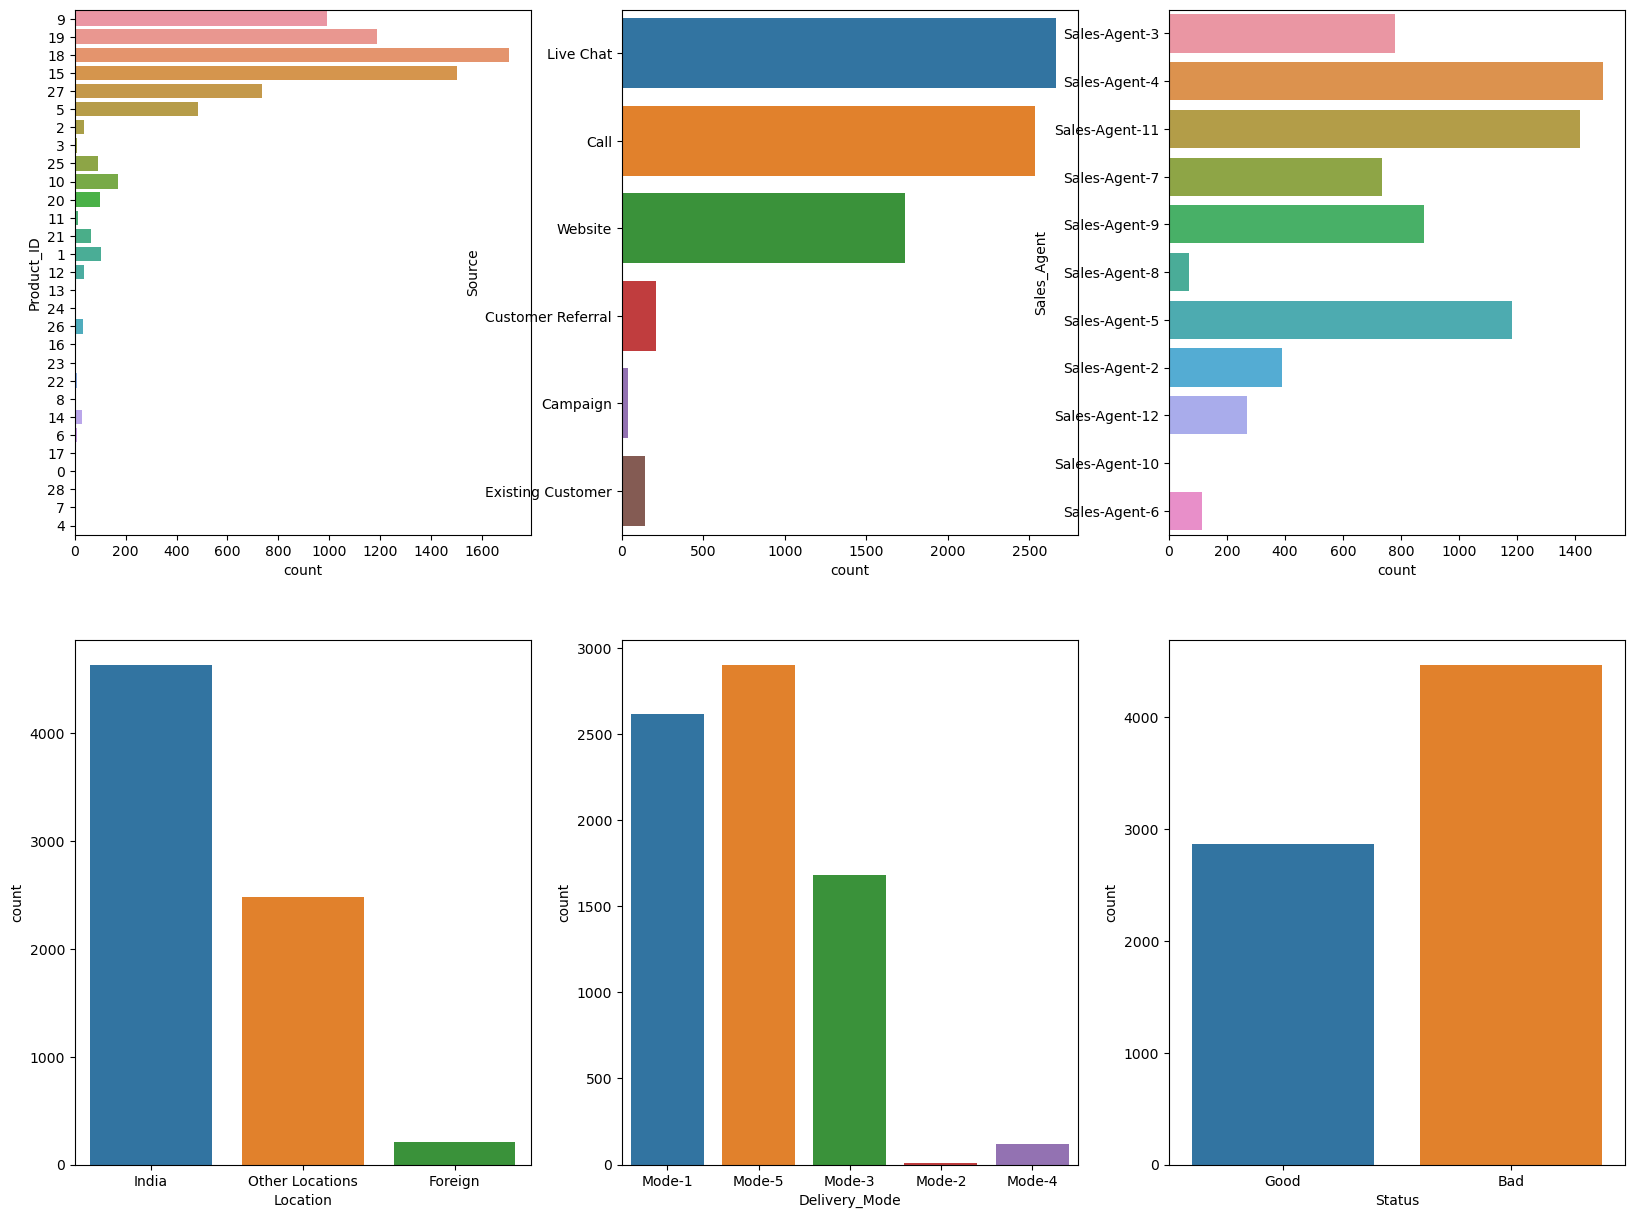

In [43]:
plt.figure(figsize=(20,15))
plt.subplot(2,3,1)
sns.countplot(y='Product_ID',data=data)
plt.subplot(2,3,2)
sns.countplot(y='Source',data=data)
plt.subplot(2,3,3)
sns.countplot(y='Sales_Agent',data=data)
plt.subplot(2,3,4)
sns.countplot(x='Location',data=data)
plt.subplot(2,3,5)
sns.countplot(x='Delivery_Mode',data=data)
plt.subplot(2,3,6)
sns.countplot(x='Status',data=data)
plt.show()

#### Data Visualization

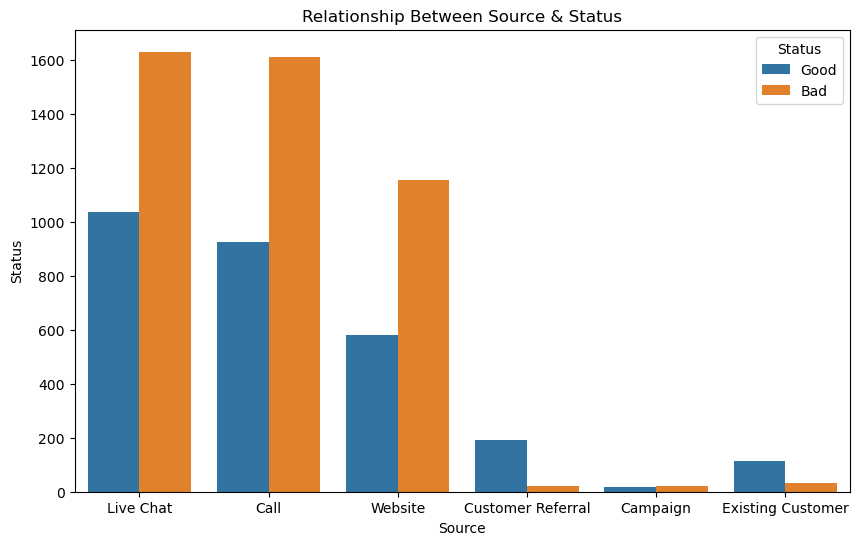

In [44]:
plt.figure(figsize=(10,6))
sns.countplot(x='Source',hue='Status',data=data)
plt.xlabel("Source")
plt.ylabel("Status")
plt.title("Relationship Between Source & Status")
plt.show()

* Insights from the above plot : 

Among the different lead sources, Customer Referral, Campaign, and Existing Customer have less than 200 leads each. This indicates that the lead generation from these sources might require improvement or additional strategies.

Live Chat and Call, on the other hand, have a nearly balanced proportion of high potential and low potential leads. They both have a total of 1000 high potential leads and 1600 low potential leads, suggesting effective lead engagement through these channels.

For Website as a lead source, there are 590 high potential leads and 1150 low potential leads. This indicates that while the website is generating a substantial number of leads, there is a higher proportion of low potential leads compared to high potential leads.

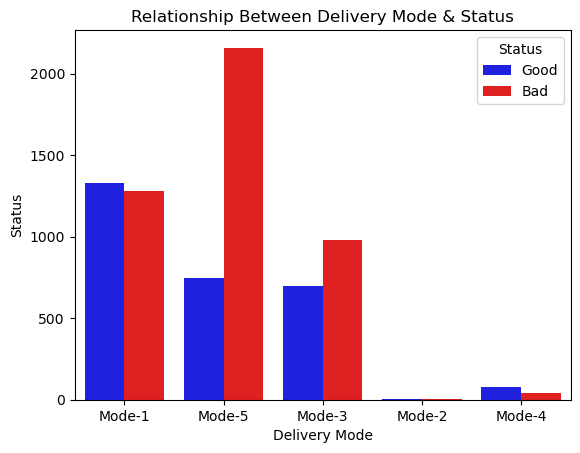

In [46]:
sns.countplot(x='Delivery_Mode',hue='Status',data=data,palette={'Bad': 'red', 'Good': 'blue'})
plt.xlabel("Delivery Mode")
plt.ylabel("Status")
plt.title("Relationship Between Delivery Mode & Status")
plt.show()

* Insights from the above plot :

In the context of Delivery Mode, Mode-1 yields 1400 high potential leads and 1300 low potential leads, suggesting a balanced performance in lead generation. However, Mode-5 delivers 700 high potential leads but has a significantly higher count of over 2000 low potential leads, indicating a potential inefficiency in lead targeting.

On the other hand, Mode-2 and Mode-4 have near-zero leads, implying minimal or ineffective lead generation through these modes.

Meanwhile, Mode-3 represents a medium-level performance in lead generation, without any significant skew towards either high or low potential leads.

To optimize lead generation and sales effectiveness, it is essential to evaluate and refine the lead acquisition strategies for Modes 1, 5, and 3. Additionally, efforts should be made to improve the lead generation methods for Modes 2 and 4, to ensure a balanced and successful lead pipeline across all delivery modes.

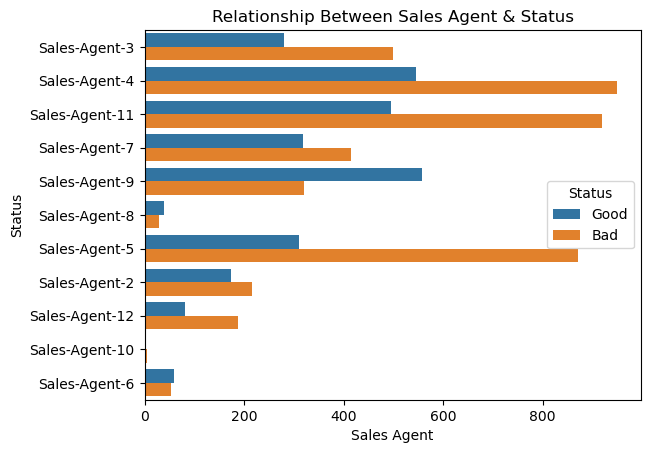

In [47]:
sns.countplot(y='Sales_Agent',hue='Status',data=data)
plt.xlabel("Sales Agent")
plt.ylabel("Status")
plt.title("Relationship Between Sales Agent & Status")
plt.show()

* Insights from the above plot :

Among the sales agents, Sales Agent 4, 11, and 9 have the highest count of Low Potential leads, but interestingly, they also have the highest count of High Potential leads compared to all other sales agents. 

This indicates that these agents are effective in engaging with both Low and High Potential leads.

On the other hand, Sales Agent 8, 2, 10, and 6 have less than 200 leads in their respective counts. 

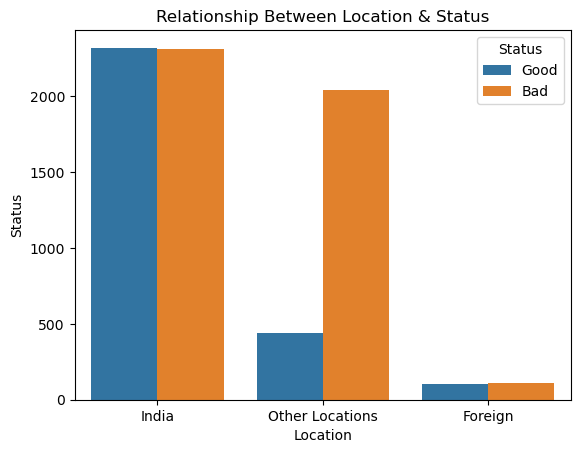

In [48]:
sns.countplot(x='Location',hue='Status',data=data)
plt.xlabel("Location")
plt.ylabel("Status")
plt.title("Relationship Between Location & Status")
plt.show()

* Insights from the above plot :

In India, the proportion of High Potential and Low Potential locations is balanced. However, in other regions, Low Potential locations have a higher count compared to High Potential locations. Additionally, foreign locations have a very low count for both High and Low Potential regions.

In [49]:
data.head()

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status
0,9,Live Chat,Sales-Agent-3,India,Mode-1,Good
1,19,Call,Sales-Agent-4,Other Locations,Mode-5,Good
2,18,Website,Sales-Agent-11,India,Mode-1,Good
3,15,Website,Sales-Agent-7,India,Mode-1,Bad
4,18,Call,Sales-Agent-7,India,Mode-1,Good


#### Converting Categorical to Numerical

In [50]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
label_encoder

LabelEncoder()

In [51]:
label_encoder.fit_transform(data['Product_ID'])

array([28, 11, 10, ..., 24, 14, 18])

In [52]:
data.head()

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status
0,9,Live Chat,Sales-Agent-3,India,Mode-1,Good
1,19,Call,Sales-Agent-4,Other Locations,Mode-5,Good
2,18,Website,Sales-Agent-11,India,Mode-1,Good
3,15,Website,Sales-Agent-7,India,Mode-1,Bad
4,18,Call,Sales-Agent-7,India,Mode-1,Good


In [53]:
columns = data.columns
columns

Index(['Product_ID', 'Source', 'Sales_Agent', 'Location', 'Delivery_Mode',
       'Status'],
      dtype='object')

In [54]:
for col in columns:
        data[col] = label_encoder.fit_transform(data[col])

In [55]:
data.head()

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status
0,28,4,4,1,0,1
1,11,0,5,2,4,1
2,10,5,1,1,0,1
3,7,5,8,1,0,0
4,10,0,8,1,0,1


In [56]:
data.dtypes

Product_ID       int32
Source           int32
Sales_Agent      int32
Location         int32
Delivery_Mode    int32
Status           int32
dtype: object

In [57]:
data.Status.value_counts()

0    4466
1    2862
Name: Status, dtype: int64

The dataset demonstrates an imbalanced class distribution, with 4466 instances in class 1 and 2862 instances in class 0. To address this, we employ the SMOTE technique to balance the dataset and enhance the accuracy of predictive models.

#### Balancing the dataset by using SMOTE oversampling technique

In [58]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
smote

SMOTE()

In [59]:
X = data.drop(['Status'],axis=1)
y = data.Status

In [60]:
X.head()

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode
0,28,4,4,1,0
1,11,0,5,2,4
2,10,5,1,1,0
3,7,5,8,1,0
4,10,0,8,1,0


In [61]:
y.head()

0    1
1    1
2    1
3    0
4    1
Name: Status, dtype: int32

In [62]:
X_resampled, y_resampled = smote.fit_resample(X,y)

In [63]:
print(len(X))
print(len(X_resampled))

7328
8932


In [64]:
print(y.value_counts())

0    4466
1    2862
Name: Status, dtype: int64


In [65]:
print(y_resampled.value_counts())

1    4466
0    4466
Name: Status, dtype: int64


# Feature Selection

In [66]:
data.corr()

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status
Product_ID,1.000000,0.067209,0.062694,-0.268012,-0.179129,0.133166
Source,0.067209,1.000000,-0.023186,-0.113249,-0.216516,-0.015411
Sales_Agent,0.062694,-0.023186,1.000000,-0.067451,-0.224688,0.137074
Location,-0.268012,-0.113249,-0.067451,1.000000,0.297702,-0.293663
Delivery_Mode,-0.179129,-0.216516,-0.224688,0.297702,1.000000,-0.220445
Status,0.133166,-0.015411,0.137074,-0.293663,-0.220445,1.000000


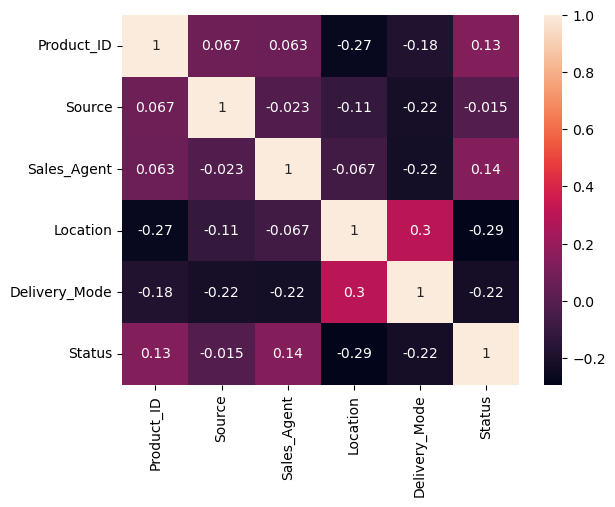

In [67]:
sns.heatmap(data.corr(),annot=True)
plt.show()

There are no significant correlations found among the features in the dataset.

# Train Test Split

In [68]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_resampled,y_resampled,test_size=0.2,random_state=42)

In [69]:
print(len(X_train))
print(len(X_test))

7145
1787


# Model Selection 

# 1. Logistic Regression

* Model Creation

In [70]:
from sklearn.linear_model import LogisticRegression
LR_Model = LogisticRegression()
LR_Model

LogisticRegression()

* Model Training

In [71]:
LR_Model.fit(X_train,y_train)

LogisticRegression()

* Model Prediction

In [72]:
y_pred = LR_Model.predict(X_test)
y_pred

array([1, 1, 1, ..., 1, 1, 1])

* Model Accuracy

In [73]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.6687185226636821

In [74]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.68      0.60      0.64       863
           1       0.66      0.73      0.69       924

    accuracy                           0.67      1787
   macro avg       0.67      0.67      0.67      1787
weighted avg       0.67      0.67      0.67      1787



# 2. Support Vector Classifier

In [75]:
from sklearn.svm import SVC
svc_model = SVC()
svc_model 

SVC()

In [76]:
svc_model.fit(X_train,y_train)

SVC()

In [77]:
y_pred = svc_model.predict(X_test)
y_pred

array([1, 1, 1, ..., 1, 1, 1])

In [78]:
accuracy_score(y_test,y_pred)

0.6843872411863459

In [79]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.70      0.61      0.65       863
           1       0.67      0.76      0.71       924

    accuracy                           0.68      1787
   macro avg       0.69      0.68      0.68      1787
weighted avg       0.69      0.68      0.68      1787



# 3. Decision Tree Classifier

In [80]:
from sklearn.tree import DecisionTreeClassifier
DT_Model = DecisionTreeClassifier()
DT_Model

DecisionTreeClassifier()

In [81]:
DT_Model.fit(X_train,y_train)

DecisionTreeClassifier()

In [82]:
y_pred = DT_Model.predict(X_test)
y_pred

array([0, 1, 0, ..., 1, 1, 0])

In [83]:
accuracy_score(y_test,y_pred)

0.7095691102406267

In [84]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.70      0.71      0.70       863
           1       0.72      0.71      0.72       924

    accuracy                           0.71      1787
   macro avg       0.71      0.71      0.71      1787
weighted avg       0.71      0.71      0.71      1787



In [85]:
param_dist = {"criterion": ['gini', 'entropy'], "max_depth": [10,50,100,None]}

In [86]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(DT_Model,param_grid=param_dist,cv=10)

In [87]:
grid.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 50, 100, None]})

In [88]:
grid.best_score_

0.711688115805763

In [89]:
grid.best_params_

{'criterion': 'entropy', 'max_depth': 100}

In [90]:
grid.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=100)

# 4. Random Forest Classifier

In [91]:
from sklearn.ensemble import RandomForestClassifier
RF_Model = RandomForestClassifier()
RF_Model

RandomForestClassifier()

In [92]:
RF_Model.fit(X_train,y_train)

RandomForestClassifier()

In [93]:
y_pred = RF_Model.predict(X_test)
y_pred

array([0, 1, 0, ..., 1, 1, 0])

In [94]:
accuracy_score(y_test,y_pred)

0.7174034695019585

In [95]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.72      0.69      0.70       863
           1       0.72      0.74      0.73       924

    accuracy                           0.72      1787
   macro avg       0.72      0.72      0.72      1787
weighted avg       0.72      0.72      0.72      1787



In [96]:
param_dist = {'n_estimators':[100,150],
              'criterion':['gini','entrophy'],
             'max_depth':[10,20],
    'min_samples_leaf': [4,5],
    'max_features': ['auto', 'sqrt', 'log2']}

In [97]:
grid_ = GridSearchCV(RF_Model,param_grid=param_dist,cv=10)

In [98]:
grid_.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entrophy'],
                         'max_depth': [10, 20],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [4, 5],
                         'n_estimators': [100, 150]})

In [99]:
grid_.best_score_

0.7140680887739711

In [100]:
grid_.best_estimator_

RandomForestClassifier(max_depth=20, min_samples_leaf=4, n_estimators=150)

In [101]:
grid_.best_params_

{'criterion': 'gini',
 'max_depth': 20,
 'max_features': 'auto',
 'min_samples_leaf': 4,
 'n_estimators': 150}

# 5. K - Nearest Neighbor Classifier

In [102]:
from sklearn.neighbors import KNeighborsClassifier
KNN_Model = KNeighborsClassifier()
KNN_Model 

KNeighborsClassifier()

In [103]:
KNN_Model.fit(X_train,y_train)

KNeighborsClassifier()

In [104]:
y_pred = KNN_Model.predict(X_test)
y_pred

array([0, 1, 0, ..., 1, 1, 0])

In [105]:
accuracy_score(y_test,y_pred)

0.6804700615556799

In [106]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.67      0.67      0.67       863
           1       0.69      0.69      0.69       924

    accuracy                           0.68      1787
   macro avg       0.68      0.68      0.68      1787
weighted avg       0.68      0.68      0.68      1787



# 6. XGBoost Classifier

In [107]:
from xgboost import XGBClassifier
XGB_Model = XGBClassifier()
XGB_Model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [108]:
XGB_Model.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [109]:
y_pred = XGB_Model.predict(X_test)
y_pred

array([0, 1, 1, ..., 1, 1, 0])

In [110]:
accuracy_score(y_test,y_pred)

0.7174034695019585

In [111]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.72      0.68      0.70       863
           1       0.72      0.75      0.73       924

    accuracy                           0.72      1787
   macro avg       0.72      0.72      0.72      1787
weighted avg       0.72      0.72      0.72      1787



In [112]:
param_dist = {'learning_rate':[0.0001,0.001,0.01,0.1],
             'max_depth':[3,4,5,6,8],
             'colsample_bytree':[0.5,0.6,0.7,0.8],
             'gamma':[0.1,0.2,0.3,0.4]}

In [113]:
grid = GridSearchCV(XGB_Model,param_grid=param_dist,cv=10)

In [114]:
grid.fit(X_train,y_train)

GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                   

In [115]:
grid.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.2, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [116]:
grid.best_score_

0.7237239231356878

In [117]:
grid.best_params_

{'colsample_bytree': 0.8, 'gamma': 0.2, 'learning_rate': 0.1, 'max_depth': 8}

# 7. Bernoulli Naive Bayes

In [118]:
from sklearn.naive_bayes import BernoulliNB
BNB_Model = BernoulliNB()
BNB_Model

BernoulliNB()

In [119]:
BNB_Model.fit(X_train,y_train)

BernoulliNB()

In [120]:
y_pred = BNB_Model.predict(X_test)
y_pred

array([0, 0, 1, ..., 1, 1, 1])

In [121]:
accuracy_score(y_test,y_pred)

0.5948517067711248

In [122]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.57      0.69      0.62       863
           1       0.63      0.51      0.57       924

    accuracy                           0.59      1787
   macro avg       0.60      0.60      0.59      1787
weighted avg       0.60      0.59      0.59      1787



# Conclusion

* We tried 7 different models as our first step in modelling process, to evaluate & choose the best model as our baseline model.


* Earlier, the Decision Tree Classifier, Random Forest Classifier, and XGBoost Classifier outperformed Support Vector Machine and K-Nearest Neighbor in terms of performance. However, Logistic Regression and Naive Bayes showed lower accuracy.


* To further improve the accuracy of the top three algorithms, we applied hyperparameter tuning using GridSearch Cross Validation.


* Decision Tree Classifier: We tuned hyperparameters like max depth, minimum samples per leaf, and the splitting criterion (gini or entropy) to find the best configuration that maximizes accuracy.


* Random Forest Classifier: For Random Forest, we optimized hyperparameters such as the number of trees (n_estimators), maximum depth of trees, minimum samples per leaf, and the splitting criterion.


* XGBoost Classifier: In XGBoost, we tuned parameters like the learning rate, number of boosting rounds (n_estimators), maximum depth of trees, and the regularization parameters (gamma and lambda).


* After hyperparameter tuning, the XGBoost Classifier achieved the highest accuracy of 72%.